# SI 618 Homework 5 - Natural Language Processing

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. Questions 1 through 6 are worth 10 points each; Question 7 is worth 20 points.

## Background

(From https://www.kaggle.com/headsortails/us-election-2020-presidential-debates.)

The US 2020 election saw the incumbent Republican president Donald Trump facing off against his Democrat challenger Joe Biden. Both candidates agreed to debate their political stances in the lead-up to the vote on November 3rd.

The 1st debate took place on September 29th at Case Western Reserve University in Cleveland, Ohio. It was moderated by Fox News anchor Chris Wallace. 

After Donald Trump tested positive for Covid-19 after his first debate and subsequently recovered, the 2nd presidential debate was initially converted into a virtual event. However, Trump declined to participate in a virtual debate and the event was transformed into a (socially distanced) town hall with Joe Biden alone. This event was moderated by George Stephanopoulos on the ABC network and took place on October 15th. Donald Trump then decided to hold a town hall of his own, which took place at the same day and time as the Biden town hall and was aired on NBC. This event was moderated by Savannah Guthrie.

The actual 2nd, and final, presidential debate between Biden and Trump took place on October 22nd at Belmont University, Nashville, Tennessee and was moderated by NBC News' Kristen Welker. This debate implemented stricter conditions on the candidates' speaking times to limit the frequent interruptions that had characterised the 1st debate.

The goal of this homework assignment is to investigate the transcripts of those events.

The data files are available via https://github.com/umsi-data-science/data/tree/main/us_election_2020.  Note that each file is available in two formats: CSV and TXT. You can work from either format -- the content of the corresponding CSV and TXT files is the same.

You can either use the correct URLs to the Raw version of the data files like we've done with other data files in the course so far, you can fork the repo if you're comfortable with ```git```, or you can click on each file and then view the "Raw" format and download the resulting file.  You do not need the us_election_2020_vice_presidential_debate files as we are only concerned with the presidential debates and town halls for this assignment.

Note that *you* will need to make decisions about how you
proceed with the analysis.  For example, you will need to 
decide whether you include or omit stopwords, whether you stem or lemmatize words before analysis, and how you handle weird situations.

You will need to decide when to exclude speech from the moderators and when to include it (note that in most cases, the assignment asks about the candidates, which means Trump and Biden and not the moderators).

Please fill in your uniqname in the next code cell:

In [1]:
MY_UNIQNAME = "cyuntao"

Answer each of the questions below.  You are encouraged to use as many code and markdown cells as you need for each question.

We **strongly** suggest running all cells from top to bottom before you submit your notebook.

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
nlp = spacy.load('en_core_web_sm')

## 1. How many words did each candidate (Trump & Biden) use in each debate?

In [3]:
first = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/us_election_2020/us_election_2020_1st_presidential_debate.csv')
first.head()

,speaker,minute,text
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...
1,Chris Wallace,02:10,This debate is being conducted under health an...
2,Vice President Joe Biden,02:49,"How you doing, man?"
3,President Donald J. Trump,02:51,How are you doing?
4,Vice President Joe Biden,02:51,I’m well.


In [4]:
first_candidate = first.drop(
    first[(first['speaker'] != 'President Donald J. Trump')
          & (first['speaker'] != 'Vice President Joe Biden')].index)
first_candidate.head()

,speaker,minute,text
2,Vice President Joe Biden,02:49,"How you doing, man?"
3,President Donald J. Trump,02:51,How are you doing?
4,Vice President Joe Biden,02:51,I’m well.
6,President Donald J. Trump,04:01,"Thank you very much, Chris. I will tell you ve..."
7,President Donald J. Trump,04:53,And we won the election and therefore we have ...


In [5]:
import string
def remove_punc(tokens):
    punc = list(string.punctuation)
    no_punc_list = []
    for token in tokens:
        if token.text not in punc:
            no_punc_list.append(token)
    return no_punc_list

In [6]:
first_candidate['doc'] = first_candidate['text'].str.lower().apply(nlp)
first_candidate['doc_no_punc'] = first_candidate['doc'].apply(remove_punc)
first_candidate['word_count'] = first_candidate['doc_no_punc'].apply(len)
first_candidate.head()

,speaker,minute,text,doc,doc_no_punc,word_count
2,Vice President Joe Biden,02:49,"How you doing, man?","(how, you, doing, ,, man, ?)","[how, you, doing, man]",4
3,President Donald J. Trump,02:51,How are you doing?,"(how, are, you, doing, ?)","[how, are, you, doing]",4
4,Vice President Joe Biden,02:51,I’m well.,"(i, ’m, well, .)","[i, ’m, well]",3
6,President Donald J. Trump,04:01,"Thank you very much, Chris. I will tell you ve...","(thank, you, very, much, ,, chris, ., i, will,...","[thank, you, very, much, chris, i, will, tell,...",161
7,President Donald J. Trump,04:53,And we won the election and therefore we have ...,"(and, we, won, the, election, and, therefore, ...","[and, we, won, the, election, and, therefore, ...",102


In [7]:
first_candidate.groupby('speaker').word_count.sum()

speaker
President Donald J. Trump    7686
Vice President Joe Biden     6965
Name: word_count, dtype: int64

In [8]:
biden_town = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/us_election_2020/us_election_2020_biden_town_hall.csv')
biden_town.head()

,speaker,minute,text
0,George Stephanopoulos,00:41,"Hey, and welcome to our town hall with Joe Bid..."
1,Joe Biden,00:46,Good to be with you.
2,George Stephanopoulos,00:47,We’re here with a group of Pennsylvania voters...
3,Joe Biden,01:02,Okay.
4,George Stephanopoulos,01:02,"And we’re going to start with Nicholas Fed, an..."


In [9]:
town_biden = biden_town.drop(
    biden_town[biden_town['speaker'] != 'Joe Biden'].index)
town_biden.head()

,speaker,minute,text
1,Joe Biden,00:46,Good to be with you.
3,Joe Biden,01:02,Okay.
5,Joe Biden,01:08,I know it well.
8,Joe Biden,01:55,"Well, first of all, going back, the fact is th..."
9,Joe Biden,02:16,"I suggested that we should be seeking, and I d..."


In [10]:
town_biden['doc'] = town_biden['text'].str.lower().apply(nlp)
town_biden['doc_no_punc'] = town_biden['doc'].apply(remove_punc)
town_biden['word_count'] = town_biden['doc_no_punc'].apply(len)
town_biden.head()

,speaker,minute,text,doc,doc_no_punc,word_count
1,Joe Biden,00:46,Good to be with you.,"(good, to, be, with, you, .)","[good, to, be, with, you]",5
3,Joe Biden,01:02,Okay.,"(okay, .)",[okay],1
5,Joe Biden,01:08,I know it well.,"(i, know, it, well, .)","[i, know, it, well]",4
8,Joe Biden,01:55,"Well, first of all, going back, the fact is th...","(well, ,, first, of, all, ,, going, back, ,, t...","[well, first, of, all, going, back, the, fact,...",61
9,Joe Biden,02:16,"I suggested that we should be seeking, and I d...","(i, suggested, that, we, should, be, seeking, ...","[i, suggested, that, we, should, be, seeking, ...",87


In [11]:
town_biden.groupby('speaker').word_count.sum()

speaker
Joe Biden    9932
Name: word_count, dtype: int64

In [12]:
trump_town = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/us_election_2020/us_election_2020_trump_town_hall.csv')
trump_town.head()

,speaker,minute,text
0,Savannah Guthrie,03:50,"It’s nothing but noise. What? Okay. All right,..."
1,Speaker 1,04:35,This is an NBC news special presentation of To...
2,Savannah Guthrie,04:40,"Tonight, Donald Trump in the arena. His first ..."
3,President Trump,04:48,"I’m feeling great, I don’t know about you. How..."
4,Savannah Guthrie,04:51,"With tonight’s debate canceled, the President ..."


In [13]:
town_trump = trump_town.drop(
    trump_town[trump_town['speaker'] != 'President Trump'].index)
town_trump.head()

,speaker,minute,text
3,President Trump,04:48,"I’m feeling great, I don’t know about you. How..."
5,President Trump,05:00,"It’s great to be back in my home state, Florid..."
7,President Trump,05:10,My goal is to fight for you and fight for your...
11,President Trump,06:37,"That was very well stated, I have to say. Good..."
13,President Trump,06:46,"Thank you, thank you."


In [14]:
town_trump['doc'] = town_trump['text'].str.lower().apply(nlp)
town_trump['doc_no_punc'] = town_trump['doc'].apply(remove_punc)
town_trump['word_count'] = town_trump['doc_no_punc'].apply(len)
town_trump.head()

,speaker,minute,text,doc,doc_no_punc,word_count
3,President Trump,04:48,"I’m feeling great, I don’t know about you. How...","(i, ’m, feeling, great, ,, i, do, n’t, know, a...","[i, ’m, feeling, great, i, do, n’t, know, abou...",14
5,President Trump,05:00,"It’s great to be back in my home state, Florid...","(it, ’s, great, to, be, back, in, my, home, st...","[it, ’s, great, to, be, back, in, my, home, st...",20
7,President Trump,05:10,My goal is to fight for you and fight for your...,"(my, goal, is, to, fight, for, you, and, fight...","[my, goal, is, to, fight, for, you, and, fight...",12
11,President Trump,06:37,"That was very well stated, I have to say. Good...","(that, was, very, well, stated, ,, i, have, to...","[that, was, very, well, stated, i, have, to, s...",11
13,President Trump,06:46,"Thank you, thank you.","(thank, you, ,, thank, you, .)","[thank, you, thank, you]",4


In [15]:
town_trump.groupby('speaker').word_count.sum()

speaker
President Trump    7356
Name: word_count, dtype: int64

In [16]:
second = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/us_election_2020/us_election_2020_2nd_presidential_debate.csv')
second.head()

,speaker,minute,text
0,Kristen Welker,00:18,"Good evening, everyone. Good evening. Thank yo..."
1,Donald Trump,07:37,How are you doing? How are you?
2,Kristen Welker,07:58,And I do want to say a very good evening to bo...
3,Kristen Welker,08:27,The goal is for you to hear each other and for...
4,Kristen Welker,09:03,… during this next stage of the coronavirus cr...


In [17]:
second_candidate = second.drop(
    second[(second['speaker'] != 'Donald Trump')
           & (second['speaker'] != 'Joe Biden')].index)
second_candidate.head()

,speaker,minute,text
1,Donald Trump,07:37,How are you doing? How are you?
5,Donald Trump,09:04,"So as you know, 2.2 million people modeled out..."
6,Donald Trump,09:41,There was a very big spike in Texas. It’s now ...
7,Donald Trump,10:04,"I can tell you from personal experience, I was..."
9,Joe Biden,11:13,"220,000 Americans dead. You hear nothing else ..."


In [18]:
second_candidate['doc'] = second_candidate['text'].str.lower().apply(nlp)
second_candidate['doc_no_punc'] = second_candidate['doc'].apply(remove_punc)
second_candidate['word_count'] = second_candidate['doc_no_punc'].apply(len)
second_candidate.head()

,speaker,minute,text,doc,doc_no_punc,word_count
1,Donald Trump,07:37,How are you doing? How are you?,"(how, are, you, doing, ?, how, are, you, ?)","[how, are, you, doing, how, are, you]",7
5,Donald Trump,09:04,"So as you know, 2.2 million people modeled out...","(so, as, you, know, ,, 2.2, million, people, m...","[so, as, you, know, 2.2, million, people, mode...",106
6,Donald Trump,09:41,There was a very big spike in Texas. It’s now ...,"(there, was, a, very, big, spike, in, texas, ....","[there, was, a, very, big, spike, in, texas, i...",79
7,Donald Trump,10:04,"I can tell you from personal experience, I was...","(i, can, tell, you, from, personal, experience...","[i, can, tell, you, from, personal, experience...",204
9,Joe Biden,11:13,"220,000 Americans dead. You hear nothing else ...","(220,000, americans, dead, ., you, hear, nothi...","[220,000, americans, dead, you, hear, nothing,...",106


In [19]:
second_candidate.groupby('speaker').word_count.sum()

speaker
Donald Trump    8058
Joe Biden       7622
Name: word_count, dtype: int64

Q1.

Here I count the total number of words, not unique words, and the punctuations are not counted. I first lower the case of the text, next tokenize the text, then remove the punctuations, and finally count the tokens.

We can see that:
* In the first debate, Trump used 7686 words, while Biden used 6965 words.
* In the town hall meetings, Biden used 9932 words. Trump used 7356 words.
* In the second debate, Trump used 8058 words, while Biden used 7622 words.

## 2. How many turns speaking did each candidate (Trump & Biden) take during each of the debates?

A "turn" is an uninterrupted period of speech.  For example, consider the following exchange:

>Chris: Big data is really interesting.

>Colleague: Actually, it's a bit boring.

>Chris: Really? Why would you say that?

>Colleague: Your choice of tools is really limited.

>Colleague: I mean, you're basically stuck with Spark, right?

>Chris: Yeah, but Spark provides most of the functionality you need to do really cool data science work.

In it, Chris had 3 turns, while his colleague had 2.

You answer should include a dataframe that looks like (with the real values instead of $__$:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>First Debate</th>
      <th>Second Debate</th>
    </tr>
    <tr>
      <th>Candidate</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Trump</th>
      <td>__</td>
      <td>__</td>
    </tr>
    <tr>
      <th>Biden</th>
      <td>__</td>
      <td>__</td>
    </tr>
  </tbody>
</table>
</div>

In [20]:
first_no_consec_dup = first.loc[first['speaker'].shift() != first['speaker']]
first_no_consec_dup.head()

,speaker,minute,text
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...
2,Vice President Joe Biden,02:49,"How you doing, man?"
3,President Donald J. Trump,02:51,How are you doing?
4,Vice President Joe Biden,02:51,I’m well.
5,Chris Wallace,03:11,"Gentlemen, a lot of people been waiting for th..."


In [21]:
turn_res = pd.DataFrame(first_no_consec_dup[(first_no_consec_dup['speaker'] == 'President Donald J. Trump')
    | (first_no_consec_dup['speaker'] == 'Vice President Joe Biden')].groupby('speaker').size())
turn_res

,0
speaker,
President Donald J. Trump,305
Vice President Joe Biden,240


In [22]:
turn_res = turn_res.rename(columns={0: 'First Debate'},
                           index={
                               'President Donald J. Trump': 'Trump',
                               'Vice President Joe Biden': 'Biden'
                           })
turn_res.index.names=['Candidate']
turn_res

,First Debate
Candidate,
Trump,305
Biden,240


In [23]:
second_no_consec_dup = second.loc[second['speaker'].shift() != second['speaker']]
second_no_consec_dup.head()

,speaker,minute,text
0,Kristen Welker,00:18,"Good evening, everyone. Good evening. Thank yo..."
1,Donald Trump,07:37,How are you doing? How are you?
2,Kristen Welker,07:58,And I do want to say a very good evening to bo...
5,Donald Trump,09:04,"So as you know, 2.2 million people modeled out..."
8,Kristen Welker,11:06,Okay. Former Vice President Biden to you. How ...


In [24]:
second_debate = second_no_consec_dup[(second_no_consec_dup['speaker'] == 'Donald Trump')
    | (second_no_consec_dup['speaker'] == 'Joe Biden')].groupby('speaker').size()
second_debate

speaker
Donald Trump    169
Joe Biden       113
dtype: int64

In [25]:
turn_res['Second Debate'] = [second_debate[0], second_debate[1]]
turn_res

,First Debate,Second Debate
Candidate,,
Trump,305,169
Biden,240,113


Q2.

Here I use `shift()` to drop consecutive duplicated speakers, so that I could count the turns directly. 

We can see that:
* Trump took 305 turns in the first debate, and 169 turns in the second debate.
* Biden took 240 turns in the first debate, and 113 turns in the second debate.

## 3. How many different nouns did each candidate (Trump & Biden) use in each of the debates?  

Present your results using a visualization (hint: a simple bar chart, with one bar per candidate per debate would be a good choice; you should decide whether you want to somehow stack or group the bars in your bar chart, or just leave them all side by side). You do not need to report **which** nouns were used.  Provide a written interpretation of your visualization.

In [26]:
def count_nouns(doc):
    uniq_noun = set()
    for token in doc:
        if token.pos_ == 'NOUN':
            uniq_noun.add(token)
    return len(uniq_noun)

In [27]:
first_candidate['noun_count'] = first_candidate['doc'].apply(count_nouns)
first_candidate.head()

,speaker,minute,text,doc,doc_no_punc,word_count,noun_count
2,Vice President Joe Biden,02:49,"How you doing, man?","(how, you, doing, ,, man, ?)","[how, you, doing, man]",4,1
3,President Donald J. Trump,02:51,How are you doing?,"(how, are, you, doing, ?)","[how, are, you, doing]",4,0
4,Vice President Joe Biden,02:51,I’m well.,"(i, ’m, well, .)","[i, ’m, well]",3,0
6,President Donald J. Trump,04:01,"Thank you very much, Chris. I will tell you ve...","(thank, you, very, much, ,, chris, ., i, will,...","[thank, you, very, much, chris, i, will, tell,...",161,26
7,President Donald J. Trump,04:53,And we won the election and therefore we have ...,"(and, we, won, the, election, and, therefore, ...","[and, we, won, the, election, and, therefore, ...",102,13


In [28]:
first_nouns = pd.DataFrame(first_candidate.groupby('speaker').noun_count.sum())
first_nouns = first_nouns.rename(columns={'noun_count': 'First Debate'},
                                 index={
                                     'President Donald J. Trump':
                                     'Donald Trump',
                                     'Vice President Joe Biden': 'Joe Biden'
                                 })
first_nouns

,First Debate
speaker,
Donald Trump,1252
Joe Biden,1201


In [29]:
second_candidate['noun_count'] = second_candidate['doc'].apply(count_nouns)
second_candidate.head()

,speaker,minute,text,doc,doc_no_punc,word_count,noun_count
1,Donald Trump,07:37,How are you doing? How are you?,"(how, are, you, doing, ?, how, are, you, ?)","[how, are, you, doing, how, are, you]",7,0
5,Donald Trump,09:04,"So as you know, 2.2 million people modeled out...","(so, as, you, know, ,, 2.2, million, people, m...","[so, as, you, know, 2.2, million, people, mode...",106,20
6,Donald Trump,09:41,There was a very big spike in Texas. It’s now ...,"(there, was, a, very, big, spike, in, texas, ....","[there, was, a, very, big, spike, in, texas, i...",79,13
7,Donald Trump,10:04,"I can tell you from personal experience, I was...","(i, can, tell, you, from, personal, experience...","[i, can, tell, you, from, personal, experience...",204,30
9,Joe Biden,11:13,"220,000 Americans dead. You hear nothing else ...","(220,000, americans, dead, ., you, hear, nothi...","[220,000, americans, dead, you, hear, nothing,...",106,21


In [30]:
second_nouns = pd.DataFrame(second_candidate.groupby('speaker').noun_count.sum())
second_nouns = second_nouns.rename(columns={'noun_count': 'Second Debate'})
second_nouns

,Second Debate
speaker,
Donald Trump,1295
Joe Biden,1331


In [31]:
nouns_res = first_nouns.merge(second_nouns, on='speaker')
nouns_res

,First Debate,Second Debate
speaker,,
Donald Trump,1252,1295
Joe Biden,1201,1331


<AxesSubplot:title={'center':'Barplot of Number of Different Nouns Used in Each Debate'}, xlabel='Candidate', ylabel='Number of different nouns'>

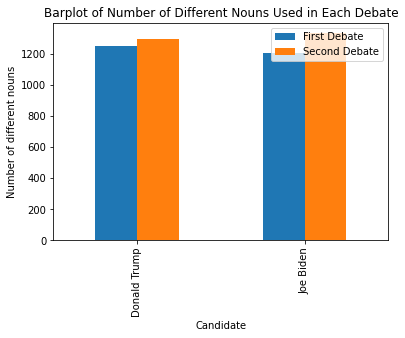

In [32]:
nouns_res.plot(
    kind='bar',
    title='Barplot of Number of Different Nouns Used in Each Debate',
    xlabel='Candidate',
    ylabel='Number of different nouns')

Q3.

We can see that Trump used 1252 different nouns in the first debate, and 1295 different nouns in the second debate. Biden used 1201 different nouns in the first debate, and 1331 different nouns in the second debate.

From this barplot, we can see that both candidates used a bit more unique nouns in the second debate. In addition, the number of different nouns used by Biden was slightly lower than that used by Trump in the first debate, but was slightly higher in the second debate. In general, the differences are small.

## 4. Report the type-token ratio for each of the candidates (Trump & Biden), based on pooling the data from the two debates, and interpret the differences between the two candidates.

In text analysis, a 'type' is a unique word, whereas a 'token' is any word.  For example, the sentence

"One fish, two fish, red fish, blue fish"

contains 8 tokens, but 5 types (one, two, red, blue, fish).

Interestingly, the type-token ratio can be used to monitor changes in the use of vocabulary items in children with under-developed vocabulary and/or word finding difficulties and, for example, in adults who have suffered a stroke and who consequently exhibit word retrieval difficulties and naming difficulties. [Ref](https://www.sltinfo.com/type-token-ratio/)

In [33]:
def type_count(doc):
    types = set()
    for token in doc:
        types.add(token.text)
    return len(types)

In [34]:
first_candidate['type_count'] = first_candidate['doc_no_punc'].apply(type_count)
first_candidate.head()

,speaker,minute,text,doc,doc_no_punc,word_count,noun_count,type_count
2,Vice President Joe Biden,02:49,"How you doing, man?","(how, you, doing, ,, man, ?)","[how, you, doing, man]",4,1,4
3,President Donald J. Trump,02:51,How are you doing?,"(how, are, you, doing, ?)","[how, are, you, doing]",4,0,4
4,Vice President Joe Biden,02:51,I’m well.,"(i, ’m, well, .)","[i, ’m, well]",3,0,3
6,President Donald J. Trump,04:01,"Thank you very much, Chris. I will tell you ve...","(thank, you, very, much, ,, chris, ., i, will,...","[thank, you, very, much, chris, i, will, tell,...",161,26,89
7,President Donald J. Trump,04:53,And we won the election and therefore we have ...,"(and, we, won, the, election, and, therefore, ...","[and, we, won, the, election, and, therefore, ...",102,13,58


In [35]:
first_sum = first_candidate.groupby('speaker').sum()
first_sum['type_count'] / first_sum['word_count']

speaker
President Donald J. Trump    0.700625
Vice President Joe Biden     0.688729
dtype: float64

In [36]:
second_candidate['type_count'] = second_candidate['doc_no_punc'].apply(type_count)
second_candidate.head()

,speaker,minute,text,doc,doc_no_punc,word_count,noun_count,type_count
1,Donald Trump,07:37,How are you doing? How are you?,"(how, are, you, doing, ?, how, are, you, ?)","[how, are, you, doing, how, are, you]",7,0,4
5,Donald Trump,09:04,"So as you know, 2.2 million people modeled out...","(so, as, you, know, ,, 2.2, million, people, m...","[so, as, you, know, 2.2, million, people, mode...",106,20,69
6,Donald Trump,09:41,There was a very big spike in Texas. It’s now ...,"(there, was, a, very, big, spike, in, texas, ....","[there, was, a, very, big, spike, in, texas, i...",79,13,43
7,Donald Trump,10:04,"I can tell you from personal experience, I was...","(i, can, tell, you, from, personal, experience...","[i, can, tell, you, from, personal, experience...",204,30,104
9,Joe Biden,11:13,"220,000 Americans dead. You hear nothing else ...","(220,000, americans, dead, ., you, hear, nothi...","[220,000, americans, dead, you, hear, nothing,...",106,21,72


In [37]:
second_sum = second_candidate.groupby('speaker').sum()
second_sum['type_count'] / second_sum['word_count']

speaker
Donald Trump    0.652023
Joe Biden       0.637103
dtype: float64

Q4.

We can see that in the first debate, the type-token ratio for Trump was 0.700625, and the type-token ratio for Biden was 0.688729. In the second debate, the type-token ratio for Trump was 0.652023, and the type-token ratio for Biden was 0.637103. In both debates, Trump had a larger type-token ratio than Biden, which indicates that Trump's words had greater lexical variety. However, this difference of lexical variation is not significant.

## 5. Compare the use of named entities by the candidates (Trump & Biden) in their town hall meetings.  What patterns, if any, do you see?  

spaCy supports the following Named Entity types:
PERSON, NORP (nationalities, religious and political groups), FAC (buildings, airports etc.), ORG (organizations), GPE (countries, cities etc.), LOC (mountain ranges, water bodies etc.), PRODUCT (products), EVENT (event names), WORK_OF_ART (books, song titles), LAW (legal document titles), LANGUAGE (named languages), DATE, TIME, PERCENT, MONEY, QUANTITY, ORDINAL and CARDINAL.

You might want to use some visualization techniques to support your claims.

In [38]:
from collections import Counter

In [39]:
biden_labels = []
for doc in town_biden['doc']:
    for token in doc.ents:
        biden_labels.append(token.label_)

In [40]:
biden_label_count = Counter(biden_labels)
biden_label_count

Counter({'ORDINAL': 20,
         'CARDINAL': 99,
         'DATE': 36,
         'NORP': 22,
         'PERCENT': 17,
         'MONEY': 22,
         'GPE': 4,
         'TIME': 1,
         'QUANTITY': 3})

In [41]:
biden_freq = {}
biden_sum =  sum(biden_label_count.values())
for label in biden_labels: 
    biden_freq[label] = biden_label_count[label] / biden_sum
pd.Series(biden_freq).sort_values(ascending=False)

CARDINAL    0.441964
DATE        0.160714
NORP        0.098214
MONEY       0.098214
ORDINAL     0.089286
PERCENT     0.075893
GPE         0.017857
QUANTITY    0.013393
TIME        0.004464
dtype: float64

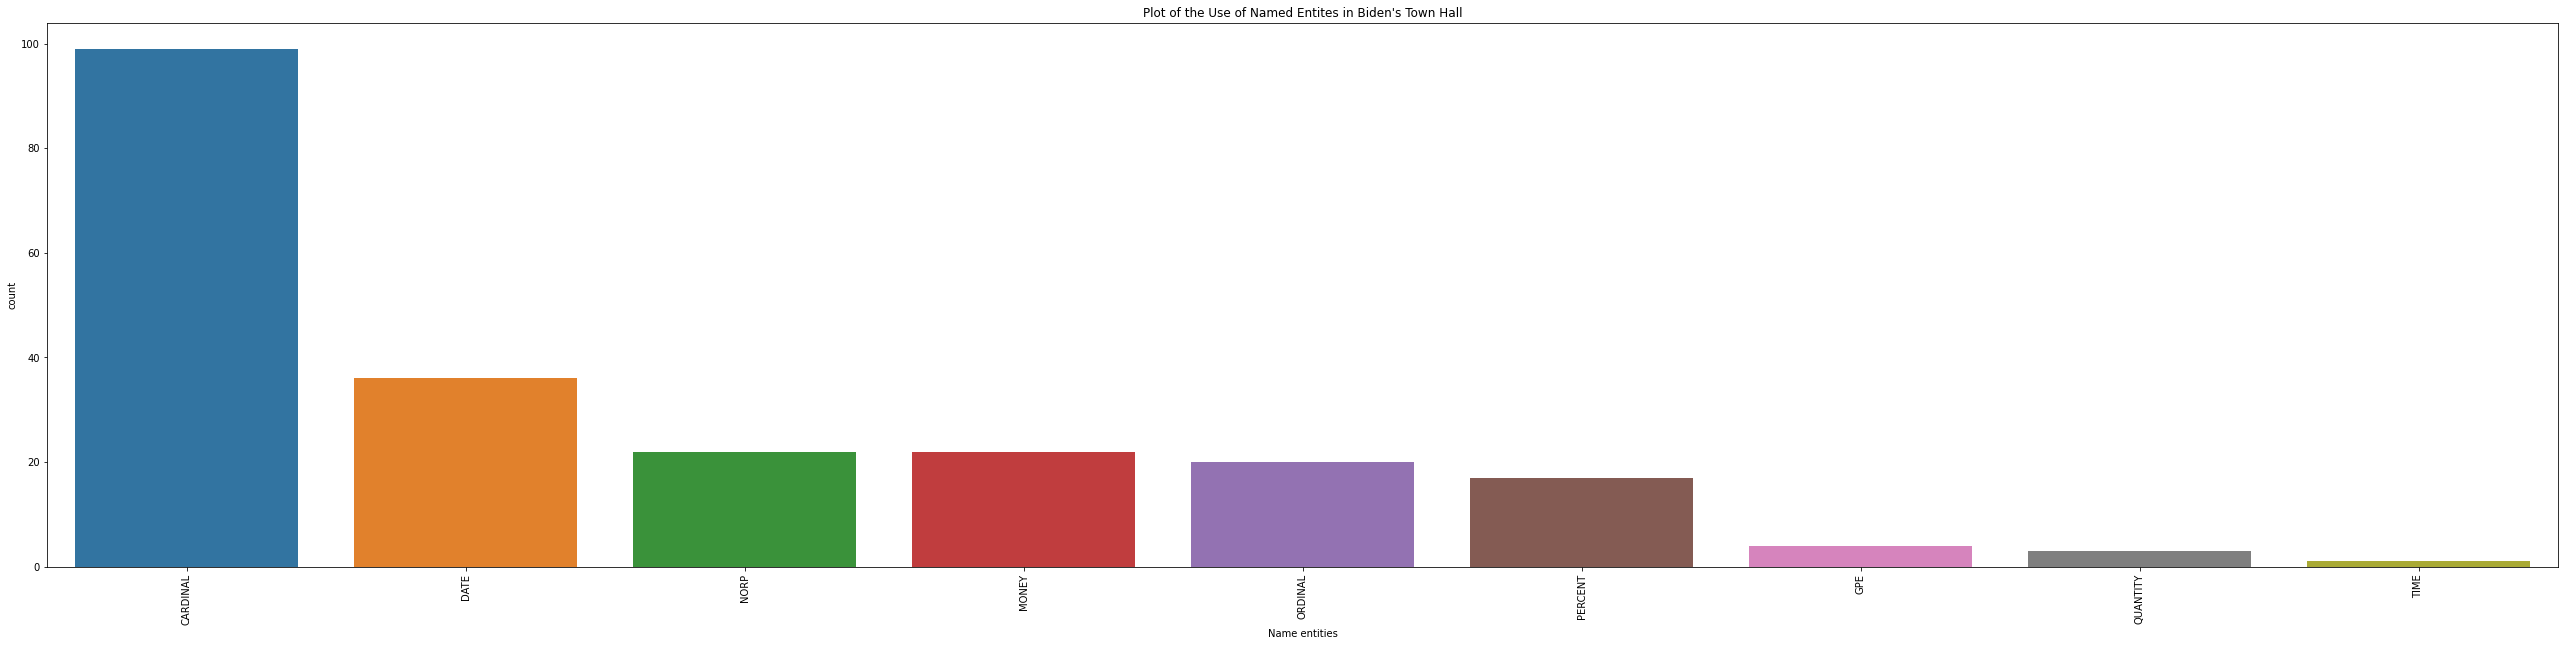

In [42]:
plt.figure(figsize=(45,10))
sns.countplot(x=biden_labels, order=pd.Series(biden_labels).value_counts().index)
plt.title("Plot of the Use of Named Entites in Biden's Town Hall")
plt.xlabel('Name entities')
plt.xticks(rotation=90)
plt.show()

In [43]:
trump_labels = []
for doc in town_trump['doc']:
    for token in doc.ents:
        trump_labels.append(token.label_)

In [44]:
trump_label_count = Counter(trump_labels)
trump_label_count

Counter({'DATE': 42,
         'NORP': 13,
         'TIME': 3,
         'ORDINAL': 3,
         'CARDINAL': 40,
         'PERCENT': 13,
         'MONEY': 4,
         'ORG': 3,
         'GPE': 3,
         'QUANTITY': 1})

In [45]:
trump_freq = {}
trump_sum = sum(trump_label_count.values())
for label in trump_labels: 
    trump_freq[label] = trump_label_count[label] / trump_sum
pd.Series(trump_freq).sort_values(ascending=False)

DATE        0.336
CARDINAL    0.320
NORP        0.104
PERCENT     0.104
MONEY       0.032
TIME        0.024
ORDINAL     0.024
ORG         0.024
GPE         0.024
QUANTITY    0.008
dtype: float64

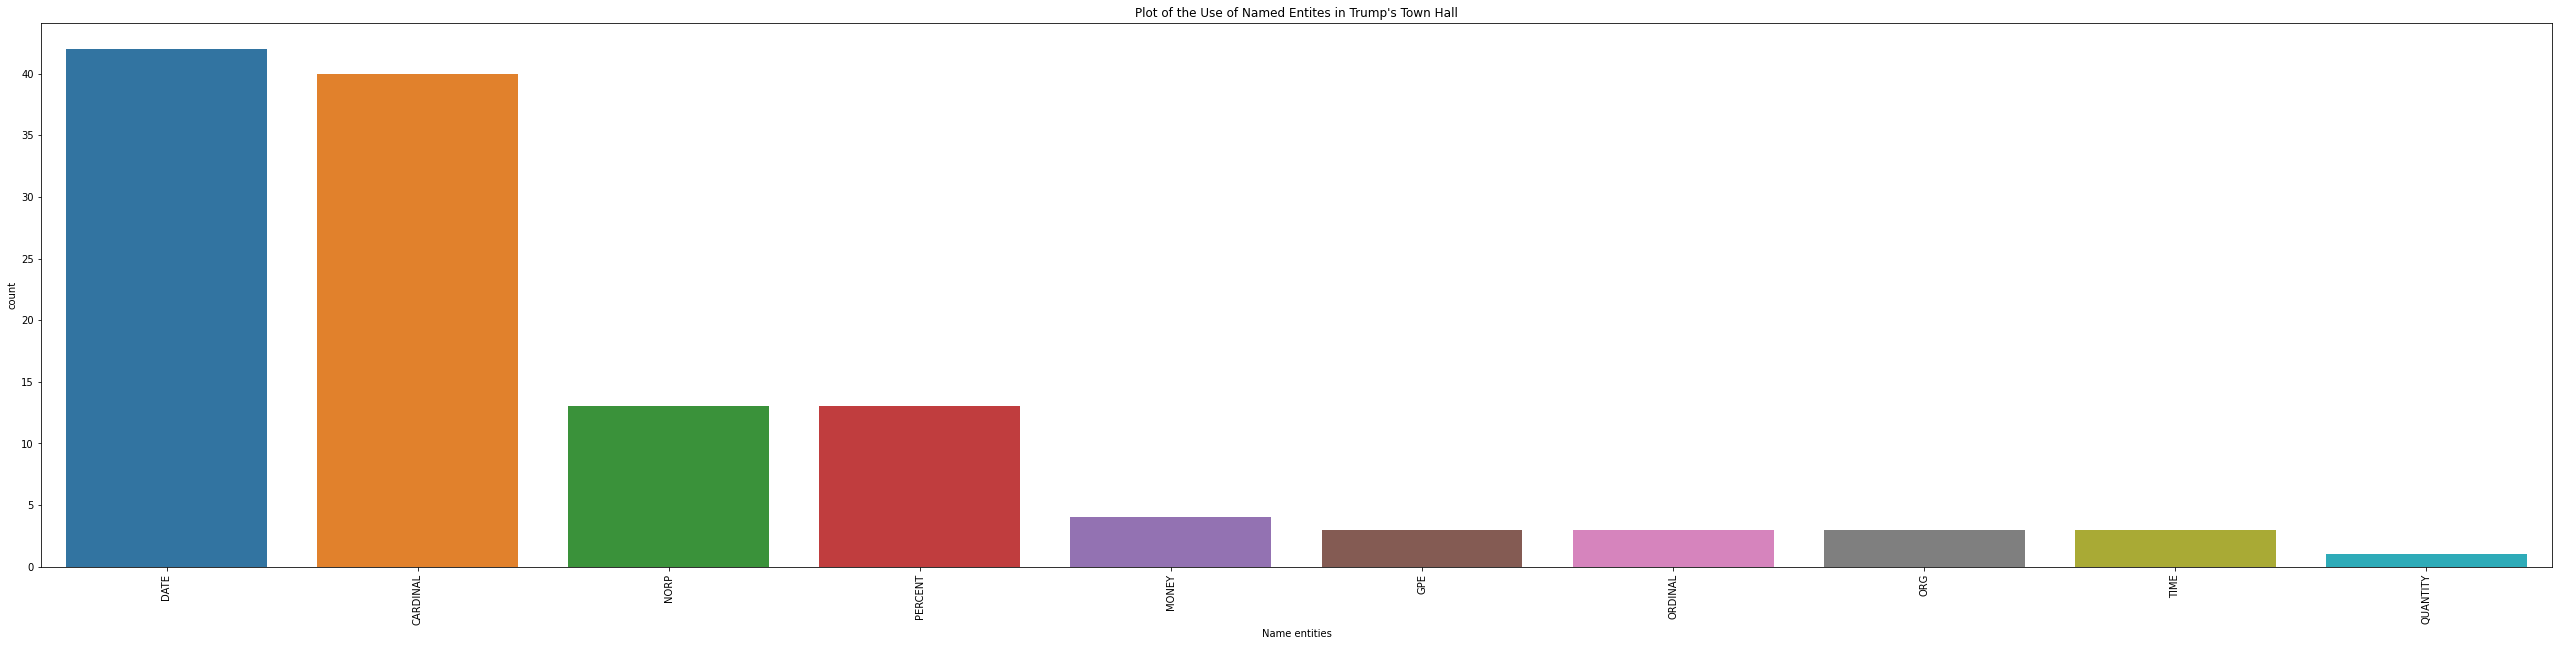

In [46]:
plt.figure(figsize=(45,10))
sns.countplot(x=trump_labels, order=pd.Series(trump_labels).value_counts().index)
plt.title("Plot of the Use of Named Entites in Trump's Town Hall")
plt.xlabel('Name entities')
plt.xticks(rotation=90)
plt.show()

In [47]:
left = pd.DataFrame({'Biden': biden_freq.values(), 'name_entity': biden_freq.keys()})
right = pd.DataFrame({'Trump': trump_freq.values(), 'name_entity': trump_freq.keys()})
freq = left.merge(right, how='outer', on='name_entity').set_index('name_entity')
freq

,Biden,Trump
name_entity,,
ORDINAL,0.089286,0.024
CARDINAL,0.441964,0.320
DATE,0.160714,0.336
NORP,0.098214,0.104
PERCENT,0.075893,0.104
MONEY,0.098214,0.032
GPE,0.017857,0.024
TIME,0.004464,0.024
QUANTITY,0.013393,0.008


<AxesSubplot:title={'center':'Barplot of Name Entity Frequencies'}, xlabel='Name entity', ylabel='Frequency'>

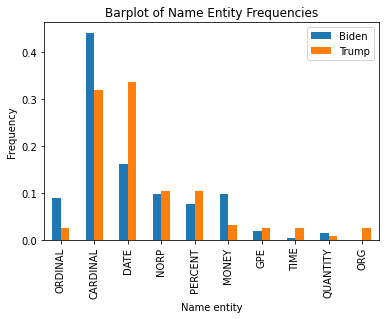

In [48]:
freq.plot(
    kind='bar',
    title='Barplot of Name Entity Frequencies',
    xlabel='Name entity',
    ylabel='Frequency')

Q5.

As Biden used more name entities than Trump, to help show the pattern, I include not only the original counts, but also the frequencies of the name entities used by Biden and Trump.

We can see that the kind of name entities used by Biden and Trump are mostly the same, excpet that Trump used one more name entity "ORG". In addition, it seems that Biden used much more "CARDINAL" , "ORDINAL", and "MONEY" name entites than Trump. On the contrary, Trump used much more "DATE" name entity than Biden. The differences on other name entities are not so significant.

## 6. Generate a word cloud for Trump's town hall (use only Trump's words) and one for Biden's town hall (again, use only Biden's words).  Compare and contrast the two word clouds.

Install a word cloud generating package like the one from https://github.com/amueller/word_cloud

In [49]:
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS

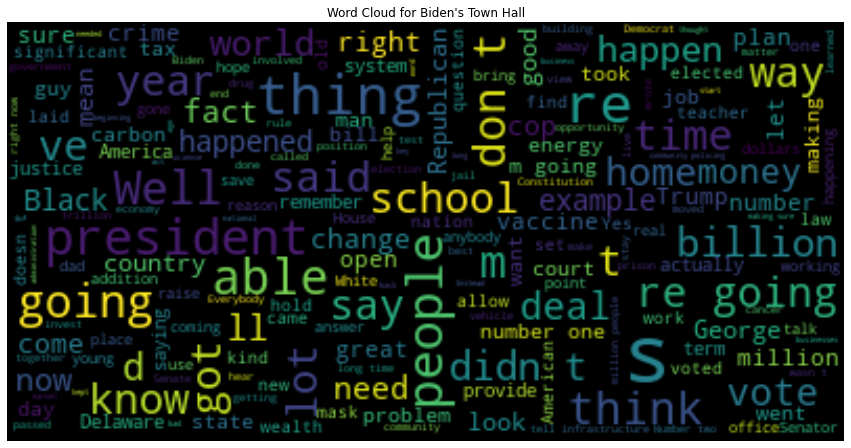

In [50]:
biden_text = ''
for txt in town_biden['text']:
    biden_text += txt
biden_words = biden_text.split()
biden_nostop_list = []
for word in biden_words:
    if word not in STOP_WORDS:
        biden_nostop_list.append(word)
biden_nostop = ' '.join(biden_nostop_list)
wordcloud_biden = WordCloud(max_font_size=40).generate(biden_nostop)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_biden, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Biden's Town Hall")
plt.show()

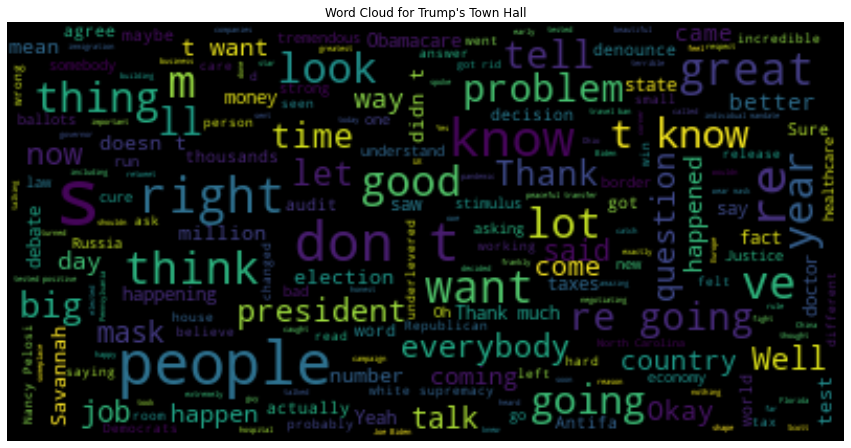

In [51]:
trump_text = ''
for txt in town_trump['text']:
    trump_text += txt
trump_words = trump_text.split()
trump_nostop_list = []
for word in trump_words:
    if word not in STOP_WORDS:
        trump_nostop_list.append(word)
trump_nostop = ' '.join(trump_nostop_list)
wordcloud_trump = WordCloud(max_font_size=40).generate(trump_nostop)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_trump, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Trump's Town Hall")
plt.show()

Q6.

In the word clouds, I set the maximum font size by `max_font_size=40` to control the font size. In addition, as we would like to see some specific patterns in Biden's and Trump's word usage, I decide to remove the stop words here.

From the two word clouds, we can see that both Biden and Trump used a lot of words like "people", "thing" and "know" and abbreviations like "m" and "s", but there are much more differences in the word usage. For example, Biden had a high usage of "able", "school", "billion", "Black" and "world", while Trump did not. On the contrary, Trump had a high usage of  "big", "great", "everybody" and "tell", while Biden did not. In addition, Biden had a higher frequency of words like "president" and "money", while Trump had a higher frequency of words like "problem", "good" and "right" through the common words.

## 7. Sentiment analysis of Trump vs. Biden in second debate

Note that you will want to review the video on Sentiment Analysis with NLTK and spaCy from the pre-recorded lectures.

Perform a sentiment analysis that compares the sentiment of the two candidates (Trump & Biden) in the second debate.  

There are several ways to do this.  In its simplest form, you could determine the sentiment for each utterance, the perform some mathematical summary (sum, mean, etc.) A slightly more elegant solution would involve tracking how sentiment changes over the course of the debate for each of the candidates.  A further extension of your work might use the [pandas.DataFrame.rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) method to calculate rolling averages, although using that function will probably require you to also learn about [time functions in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

No matter what approach you choose, you should be sure to use visualizations in your answer.  As always, provide an interpretation of your results, including any visualizations (i.e. don't just provide a visualization, explain what's interesting that you see in your visualizations).

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()
def sentiment_scores(docx):
    return sent_analyzer.polarity_scores(docx.text)
from spacy.tokens import Doc
Doc.set_extension("sentimenter",getter=sentiment_scores)

In [53]:
second_candidate['rating'] = second_candidate['doc'].apply(lambda x: x._.sentimenter['compound'])
second_candidate[['speaker', 'minute', 'rating','text']].head(10)

,speaker,minute,rating,text
1,Donald Trump,07:37,0.0000,How are you doing? How are you?
5,Donald Trump,09:04,-0.9190,"So as you know, 2.2 million people modeled out..."
6,Donald Trump,09:41,0.3612,There was a very big spike in Texas. It’s now ...
7,Donald Trump,10:04,0.5574,"I can tell you from personal experience, I was..."
9,Joe Biden,11:13,0.1518,"220,000 Americans dead. You hear nothing else ..."
10,Joe Biden,11:56,-0.5423,"The expectation is we’ll have another 200,000 ..."
11,Joe Biden,12:19,0.8834,What I would do is make sure we have everyone ...
12,Joe Biden,12:41,-0.6449,We’re in a situation now where the New England...
14,Donald Trump,13:13,0.6736,"No, it’s not a guarantee, but it will be by th..."
16,Donald Trump,13:23,0.7335,Johnson & Johnson is doing very well. Moderna ...


In [54]:
second_candidate.groupby('speaker')['rating'].mean()

speaker
Donald Trump    0.033096
Joe Biden       0.010071
Name: rating, dtype: float64

In [55]:
second_candidate[second_candidate['minute'] == '00:00']

,speaker,minute,text,doc,doc_no_punc,word_count,noun_count,type_count,rating
89,Donald Trump,00:00,They both want you to lose because there has b...,"(they, both, want, you, to, lose, because, the...","[they, both, want, you, to, lose, because, the...",85,15,56,0.1779
337,Joe Biden,00:00,"Making sure that you, in fact, if you get pull...","(making, sure, that, you, ,, in, fact, ,, if, ...","[making, sure, that, you, in, fact, if, you, g...",213,44,121,0.9902


In [56]:
second_candidate['second'] = [int(a) * 60 + int(b) for a,b in second_candidate['minute'].str.split(':')]
second_candidate.loc[(second_candidate.index > 88) & (second_candidate.index < 337), 'second'] += second_candidate['second'].loc[88]
second_candidate.loc[second_candidate.index > 336, 'second'] += second_candidate['second'].loc[336]
second_candidate.loc[[88,89,90,336,337,339]]

,speaker,minute,text,doc,doc_no_punc,word_count,noun_count,type_count,rating,second
88,Donald Trump,32:22,"Now, about your thing last night. I knew all a...","(now, ,, about, your, thing, last, night, ., i...","[now, about, your, thing, last, night, i, knew...",36,6,29,0.5574,1942
89,Donald Trump,00:00,They both want you to lose because there has b...,"(they, both, want, you, to, lose, because, the...","[they, both, want, you, to, lose, because, the...",85,15,56,0.1779,1942
90,Donald Trump,00:33,"And I’ll tell you, they were so bad. They took...","(and, i, ’ll, tell, you, ,, they, were, so, ba...","[and, i, ’ll, tell, you, they, were, so, bad, ...",186,28,103,-0.8885,1975
336,Joe Biden,39:14,I do. I do. My daughter is a social worker and...,"(i, do, ., i, do, ., my, daughter, is, a, soci...","[i, do, i, do, my, daughter, is, a, social, wo...",144,26,99,-0.5789,4296
337,Joe Biden,00:00,"Making sure that you, in fact, if you get pull...","(making, sure, that, you, ,, in, fact, ,, if, ...","[making, sure, that, you, in, fact, if, you, g...",213,44,121,0.9902,4296
339,Donald Trump,01:15,"Yes, I do. And again, he’s been in government ...","(yes, ,, i, do, ., and, again, ,, he, ’s, been...","[yes, i, do, and, again, he, ’s, been, in, gov...",169,29,95,-0.9215,4371


In [57]:
start = pd.Timestamp('20201022 18:00:00').tz_localize('US/Pacific')
second_candidate['timestamp'] = pd.to_datetime(start + pd.to_timedelta(second_candidate['second'], unit='s'))
second_candidate.head()

,speaker,minute,text,doc,doc_no_punc,word_count,noun_count,type_count,rating,second,timestamp
1,Donald Trump,07:37,How are you doing? How are you?,"(how, are, you, doing, ?, how, are, you, ?)","[how, are, you, doing, how, are, you]",7,0,4,0.0000,457,2020-10-22 18:07:37-07:00
5,Donald Trump,09:04,"So as you know, 2.2 million people modeled out...","(so, as, you, know, ,, 2.2, million, people, m...","[so, as, you, know, 2.2, million, people, mode...",106,20,69,-0.9190,544,2020-10-22 18:09:04-07:00
6,Donald Trump,09:41,There was a very big spike in Texas. It’s now ...,"(there, was, a, very, big, spike, in, texas, ....","[there, was, a, very, big, spike, in, texas, i...",79,13,43,0.3612,581,2020-10-22 18:09:41-07:00
7,Donald Trump,10:04,"I can tell you from personal experience, I was...","(i, can, tell, you, from, personal, experience...","[i, can, tell, you, from, personal, experience...",204,30,104,0.5574,604,2020-10-22 18:10:04-07:00
9,Joe Biden,11:13,"220,000 Americans dead. You hear nothing else ...","(220,000, americans, dead, ., you, hear, nothi...","[220,000, americans, dead, you, hear, nothing,...",106,21,72,0.1518,673,2020-10-22 18:11:13-07:00


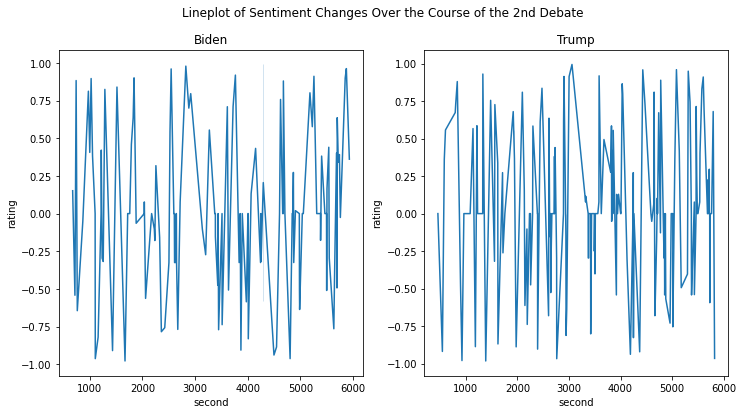

In [58]:
second_biden = second_candidate[second_candidate.speaker == 'Joe Biden'].copy()
second_trump = second_candidate[second_candidate.speaker == 'Donald Trump'].copy()
f, axs = plt.subplots(1,2, figsize=(12,6))
f.suptitle('Lineplot of Sentiment Changes Over the Course of the 2nd Debate')
_ = sns.lineplot(x='second', y='rating', data=second_biden, ax=axs[0]).set_title('Biden')
_ = sns.lineplot(x='second', y='rating', data=second_trump, ax=axs[1]).set_title('Trump')

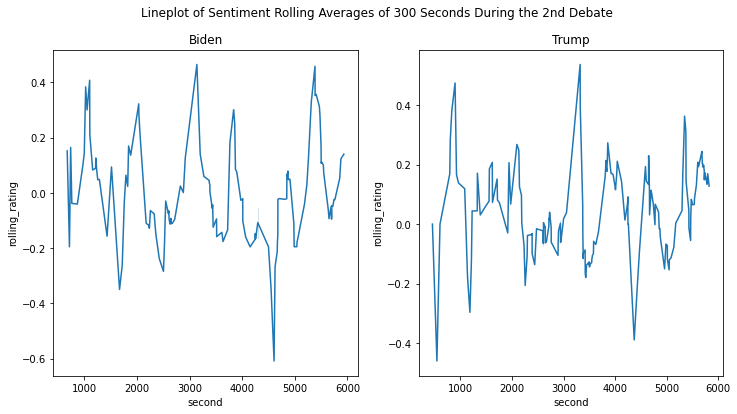

In [59]:
second_biden.loc[:,'rolling_rating'] = second_biden[['rating', 'timestamp']].rolling('300s', on='timestamp').mean()['rating']
second_trump.loc[:,'rolling_rating'] = second_trump[['rating', 'timestamp']].rolling('300s', on='timestamp').mean()['rating']
f, axs = plt.subplots(1,2, figsize=(12,6))
f.suptitle('Lineplot of Sentiment Rolling Averages of 300 Seconds During the 2nd Debate')
_ = sns.lineplot(x='second', y='rolling_rating', data=second_biden, ax=axs[0]).set_title('Biden')
_ = sns.lineplot(x='second', y='rolling_rating', data=second_trump, ax=axs[1]).set_title('Trump')

Q7.

I first obtain the sentiment rating for each utterance in the second debate, and then calculate the mean for each candidate. Trump's words had a rating of 0.033096, which was slightly higher than the rating of Biden's words, 0.010071. Their sentiment seems to be neutral in the debate.

Then I track how sentiment changes over the course of the debate. According to the `minute` column, the time records seem to be resetted two times. By reading the text around the resetting points, I think these resets do not mean different sections of the debates, so I just create a new column `second` to convert the `minute` data into numbers, and the data is converted to have the unit of second. Here as all the speakers around the resetting points are the candidates, the time is contiuous, which means I don't need to extract the original data to calculate the time. I create 2 line plots of sentiment changes over the course of the debate for each candidate. It seems that both candidates have sentiment fluctuations during the course of the debate. However, it is a bit difficult to observe patterns from these 2 plots, so finally, I calculate the rolling averages over time periods of 300 seconds (5 minutes).

Calculating the rolling average requires timestamp. According to https://www.latimes.com/politics/story/2020-10-21/how-to-watch-final-presidential-debate-trump-biden, the debate started at 6 p.m., Oct. 22nd, Pacfic time, so I transform the `second` column to timestamps. I still create 2 lineplots of sentiment changes over the course of the debate for each candidate. This time the plots look better. Again, we could see that both candidates have sentiment fluctuations during the course of the debate. In addition, we could see:
* Sometimes the candidates tend to have similar trend of sentiment fluctuations, although quite a few differences exist.
* It seems that Trump had a large decrease of the sentiment rating at the beginning of the debate. 
* Both candidates had a large decrease of the sentiment rating around 4500s after the debate started, and Biden's decrease was larger.

# Please submit your notebook in .IPYNB and .HTML formats

We **strongly** suggest running all cells from top to bottom before you submit your notebook.